In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

import joblib
import pickle

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Connector for python programs to access MySQL databases

from sqlalchemy import create_engine
from urllib.parse import quote 

user_name = 'root'
database = 'SCM_dehire'
your_password = 'Sql@12345'
engine = create_engine(f'mysql+pymysql://{user_name}:%s@localhost:3306/{database}' % quote(f'{your_password}'))

sql_query = "select * from SCM_dehire.dehire"

df = pd.read_sql(sql_query,engine)

df

,POSTING DATE,EFFECTIVE DATE,CREATE DATE,TRANSFER IN EFFECTIVE DATE,Customer/Vendor Code,Customer/Vendor Name,LOB,Region,BP TYPE,City,...,U_DocStatus,NumAtCard,U_SOTYPE,BP CATEGORY,Document Type,TRANSPORTER NAME,U_GRNNO,Loading/Unloading,Detention,U_AssetClass
0,04-12-2019,04-12-2019,04-12-2019,None,10001548,Cart Services Pvt. Ltd. _ Bhiwandi _Antariksh ...,FMCG,West,RENTAL,Bhiwandi,...,C,None,None,Ecommerce,Dehire Received,LOGISTICS TECK LLP,None,1890.0,NaN,Wooden Pallet
1,04-12-2019,04-12-2019,04-12-2019,None,10001548,Cart Services Pvt. Ltd. _ Bhiwandi _Antariksh ...,FMCG,West,RENTAL,Bhiwandi,...,C,None,None,Ecommerce,Dehire Received,LOGISTICS TECK LLP,None,1890.0,NaN,Wooden Pallet
2,04-12-2019,04-12-2019,04-12-2019,None,10001548,Cart Services Pvt. Ltd. _ Bhiwandi _Antariksh ...,FMCG,West,RENTAL,Bhiwandi,...,C,None,None,Ecommerce,Dehire Received,LOGISTICS TECK LLP,None,1890.0,NaN,Wooden Pallet
3,04-12-2019,04-12-2019,04-12-2019,None,10001548,Cart Services Pvt. Ltd. _ Bhiwandi _Antariksh ...,FMCG,West,RENTAL,Bhiwandi,...,C,None,None,Ecommerce,Dehire Received,LOGISTICS TECK LLP,None,1890.0,NaN,Wooden Pallet
4,04-12-2019,04-12-2019,04-12-2019,None,10001548,Cart Services Pvt. Ltd. _ Bhiwandi _Antariksh ...,FMCG,West,RENTAL,Bhiwandi,...,C,None,None,Ecommerce,Dehire Received,LOGISTICS TECK LLP,None,1890.0,NaN,Wooden Pallet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,29-11-2022,29-11-2022,29-11-2022,None,10006524,Cart Services Pvt. Ltd. _ Hyderabad _Pudur,FMCG,South,RENTAL,Hyderabad,...,C,None,None,Ecommerce,Dehire Received,Customer Transport,None,NaN,NaN,Wooden Pallet
1834,29-11-2022,25-11-2022,29-11-2022,None,10002429,Cart Services Pvt. Ltd. _ Patna _Bihta,FMCG,East,RENTAL,Patna,...,C,None,None,Ecommerce,Dehire Received,LOGISTICS TECK LLP,None,0.0,0.0,Wooden Pallet
1835,29-11-2022,26-11-2022,29-11-2022,None,10002429,Cart Services Pvt. Ltd. _ Patna _Bihta,FMCG,East,RENTAL,Patna,...,C,None,None,Ecommerce,Dehire Received,LOGISTICS TECK LLP,None,0.0,0.0,Wooden Pallet
1836,29-11-2022,29-11-2022,29-11-2022,None,10006524,Cart Services Pvt. Ltd. _ Hyderabad _Pudur,FMCG,South,RENTAL,Hyderabad,...,C,None,None,Ecommerce,Dehire Received,Customer Transport,None,NaN,NaN,Wooden Pallet - SS


In [3]:
# Gives the no. of rows & columns
df.shape

(1838, 37)

In [5]:
# Gives the names of the columns
df.columns

Index(['POSTING DATE', 'EFFECTIVE DATE', 'CREATE DATE',
       'TRANSFER IN EFFECTIVE DATE', 'Customer/Vendor Code',
       'Customer/Vendor Name', 'LOB', 'Region', 'BP TYPE', 'City', 'STATE',
       'From WhsCode', 'From WhsName', 'To whsCode', 'TO WhsName',
       'Model TYPE', 'Transfer Type', 'U_Frt', 'U_ActShipType',
       'PRODUCT CATEGORY', 'ItemCode', 'QUANTITY', 'UNIT', 'RATE', 'SO ID',
       'SO Creation Date', 'SO Due Date', 'U_DocStatus', 'NumAtCard',
       'U_SOTYPE', 'BP CATEGORY', 'Document Type', 'TRANSPORTER NAME',
       'U_GRNNO', 'Loading/Unloading', 'Detention', 'U_AssetClass'],
      dtype='object')

In [6]:
 # Gives information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   POSTING DATE                1838 non-null   object 
 1   EFFECTIVE DATE              1838 non-null   object 
 2   CREATE DATE                 1838 non-null   object 
 3   TRANSFER IN EFFECTIVE DATE  0 non-null      object 
 4   Customer/Vendor Code        1838 non-null   int64  
 5   Customer/Vendor Name        1838 non-null   object 
 6   LOB                         1838 non-null   object 
 7   Region                      1838 non-null   object 
 8   BP TYPE                     1838 non-null   object 
 9   City                        1838 non-null   object 
 10  STATE                       1838 non-null   object 
 11  From WhsCode                1838 non-null   object 
 12  From WhsName                1838 non-null   object 
 13  To whsCode                  1838 

In [4]:
# The data type of the Date_Time column is object, and we need to change it to datetime.

df['POSTING DATE'] = pd.to_datetime(df['POSTING DATE'] , format = '%d-%m-%Y')
data = df.drop(['POSTING DATE'], axis=1)
data.index = df['POSTING DATE']

df['EFFECTIVE DATE'] = pd.to_datetime(df['EFFECTIVE DATE'] , format = '%d-%m-%Y')
data = df.drop(['EFFECTIVE DATE'], axis=1)
data.index = df['EFFECTIVE DATE']

df['CREATE DATE'] = pd.to_datetime(df['CREATE DATE'] , format = '%d-%m-%Y')
data = df.drop(['CREATE DATE'], axis=1)
data.index = df['CREATE DATE']

In [8]:
 # Gives information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   POSTING DATE                1838 non-null   datetime64[ns]
 1   EFFECTIVE DATE              1838 non-null   datetime64[ns]
 2   CREATE DATE                 1838 non-null   datetime64[ns]
 3   TRANSFER IN EFFECTIVE DATE  0 non-null      object        
 4   Customer/Vendor Code        1838 non-null   int64         
 5   Customer/Vendor Name        1838 non-null   object        
 6   LOB                         1838 non-null   object        
 7   Region                      1838 non-null   object        
 8   BP TYPE                     1838 non-null   object        
 9   City                        1838 non-null   object        
 10  STATE                       1838 non-null   object        
 11  From WhsCode                1838 non-null   object      

In [9]:
# Checking for 0 values

df.isna().sum()

POSTING DATE                     0
EFFECTIVE DATE                   0
CREATE DATE                      0
TRANSFER IN EFFECTIVE DATE    1838
Customer/Vendor Code             0
Customer/Vendor Name             0
LOB                              0
Region                           0
BP TYPE                          0
City                             0
STATE                            0
From WhsCode                     0
From WhsName                     0
To whsCode                       0
TO WhsName                       0
Model TYPE                       0
Transfer Type                    0
U_Frt                           10
U_ActShipType                    0
PRODUCT CATEGORY                 0
ItemCode                         0
QUANTITY                         0
UNIT                            37
RATE                             3
SO ID                         1838
SO Creation Date              1838
SO Due Date                   1838
U_DocStatus                      0
NumAtCard           

In [10]:
# Gives the first 5 rows of the dataset
df.head()

,POSTING DATE,EFFECTIVE DATE,CREATE DATE,TRANSFER IN EFFECTIVE DATE,Customer/Vendor Code,Customer/Vendor Name,LOB,Region,BP TYPE,City,...,U_DocStatus,NumAtCard,U_SOTYPE,BP CATEGORY,Document Type,TRANSPORTER NAME,U_GRNNO,Loading/Unloading,Detention,U_AssetClass
0,2019-12-04,2019-12-04,2019-12-04,None,10001548,Cart Services Pvt. Ltd. _ Bhiwandi _Antariksh ...,FMCG,West,RENTAL,Bhiwandi,...,C,None,None,Ecommerce,Dehire Received,LOGISTICS TECK LLP,None,1890.0,NaN,Wooden Pallet
1,2019-12-04,2019-12-04,2019-12-04,None,10001548,Cart Services Pvt. Ltd. _ Bhiwandi _Antariksh ...,FMCG,West,RENTAL,Bhiwandi,...,C,None,None,Ecommerce,Dehire Received,LOGISTICS TECK LLP,None,1890.0,NaN,Wooden Pallet
2,2019-12-04,2019-12-04,2019-12-04,None,10001548,Cart Services Pvt. Ltd. _ Bhiwandi _Antariksh ...,FMCG,West,RENTAL,Bhiwandi,...,C,None,None,Ecommerce,Dehire Received,LOGISTICS TECK LLP,None,1890.0,NaN,Wooden Pallet
3,2019-12-04,2019-12-04,2019-12-04,None,10001548,Cart Services Pvt. Ltd. _ Bhiwandi _Antariksh ...,FMCG,West,RENTAL,Bhiwandi,...,C,None,None,Ecommerce,Dehire Received,LOGISTICS TECK LLP,None,1890.0,NaN,Wooden Pallet
4,2019-12-04,2019-12-04,2019-12-04,None,10001548,Cart Services Pvt. Ltd. _ Bhiwandi _Antariksh ...,FMCG,West,RENTAL,Bhiwandi,...,C,None,None,Ecommerce,Dehire Received,LOGISTICS TECK LLP,None,1890.0,NaN,Wooden Pallet


In [11]:
# Gives descriptive statistics
df.describe()

,Customer/Vendor Code,U_Frt,QUANTITY,RATE,Loading/Unloading,Detention
count,1.838000e+03,1828.000000,1838.000000,1835.000000,1151.000000,885.0
mean,1.000297e+07,2289.230853,-184.311208,1824.168888,226.493484,0.0
std,2.034290e+03,3559.337877,143.393110,976.601880,577.359398,0.0
min,1.000041e+07,0.000000,-1578.000000,0.000000,0.000000,0.0
25%,1.000149e+07,1.000000,-300.000000,1500.000000,0.000000,0.0
50%,1.000221e+07,10.000000,-190.000000,1950.000000,0.000000,0.0
75%,1.000586e+07,4000.000000,-64.000000,1950.000000,0.000000,0.0
max,1.000794e+07,26000.000000,-1.000000,16000.000000,6000.000000,0.0


In [12]:
df_num = df.select_dtypes(include=np.number)
df_num

,Customer/Vendor Code,U_Frt,QUANTITY,RATE,Loading/Unloading,Detention
0,10001548,3000.0,-2,1500.00,1890.0,NaN
1,10001548,3000.0,-2,1500.00,1890.0,NaN
2,10001548,3000.0,-5,1500.00,1890.0,NaN
3,10001548,3000.0,-179,1950.00,1890.0,NaN
4,10001548,3000.0,-197,1950.00,1890.0,NaN
...,...,...,...,...,...,...
1833,10006524,0.0,-150,1950.00,NaN,NaN
1834,10002429,10.0,-305,1950.00,0.0,0.0
1835,10002429,10.0,-305,1950.00,0.0,0.0
1836,10006524,0.0,-150,269.46,NaN,NaN


In [13]:
# Mean
df_num.mean()

Customer/Vendor Code    1.000297e+07
U_Frt                   2.289231e+03
QUANTITY               -1.843112e+02
RATE                    1.824169e+03
Loading/Unloading       2.264935e+02
Detention               0.000000e+00
dtype: float64

In [14]:
# Median
df_num.median()

Customer/Vendor Code    10002210.0
U_Frt                         10.0
QUANTITY                    -190.0
RATE                        1950.0
Loading/Unloading              0.0
Detention                      0.0
dtype: float64

In [14]:
# Mode
df.mode()

,POSTING DATE,EFFECTIVE DATE,CREATE DATE,TRANSFER IN EFFECTIVE DATE,Customer/Vendor Code,Customer/Vendor Name,LOB,Region,BP TYPE,City,...,U_DocStatus,NumAtCard,U_SOTYPE,BP CATEGORY,Document Type,TRANSPORTER NAME,U_GRNNO,Loading/Unloading,Detention,U_AssetClass
0,2019-12-09,2019-12-09,2019-12-09,NaN,10002436,Cart Services Pvt. Ltd. _ Hosur _U2 BTS Large,FMCG,South,RENTAL,Hosur,...,C,NaN,Return,Ecommerce,Dehire Received,LOGISTICS TECK LLP,NaN,0.0,0.0,Wooden Pallet


In [15]:
# Variance
df_num.var()

Customer/Vendor Code    4.138334e+06
U_Frt                   1.266889e+07
QUANTITY                2.056158e+04
RATE                    9.537512e+05
Loading/Unloading       3.333439e+05
Detention               0.000000e+00
dtype: float64

In [16]:
# Standard Deviation  
df_num.std()

Customer/Vendor Code    2034.289587
U_Frt                   3559.337877
QUANTITY                 143.393110
RATE                     976.601880
Loading/Unloading        577.359398
Detention                  0.000000
dtype: float64

In [17]:
# Skewness 
df_num.skew()

Customer/Vendor Code    0.914277
U_Frt                   1.862604
QUANTITY               -2.042824
RATE                    8.091220
Loading/Unloading       3.800297
Detention               0.000000
dtype: float64

In [18]:
# Kurtosis
df_num.kurt()

Customer/Vendor Code     -0.879750
U_Frt                     4.469407
QUANTITY                 14.626799
RATE                    107.712303
Loading/Unloading        22.090400
Detention                 0.000000
dtype: float64

### Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

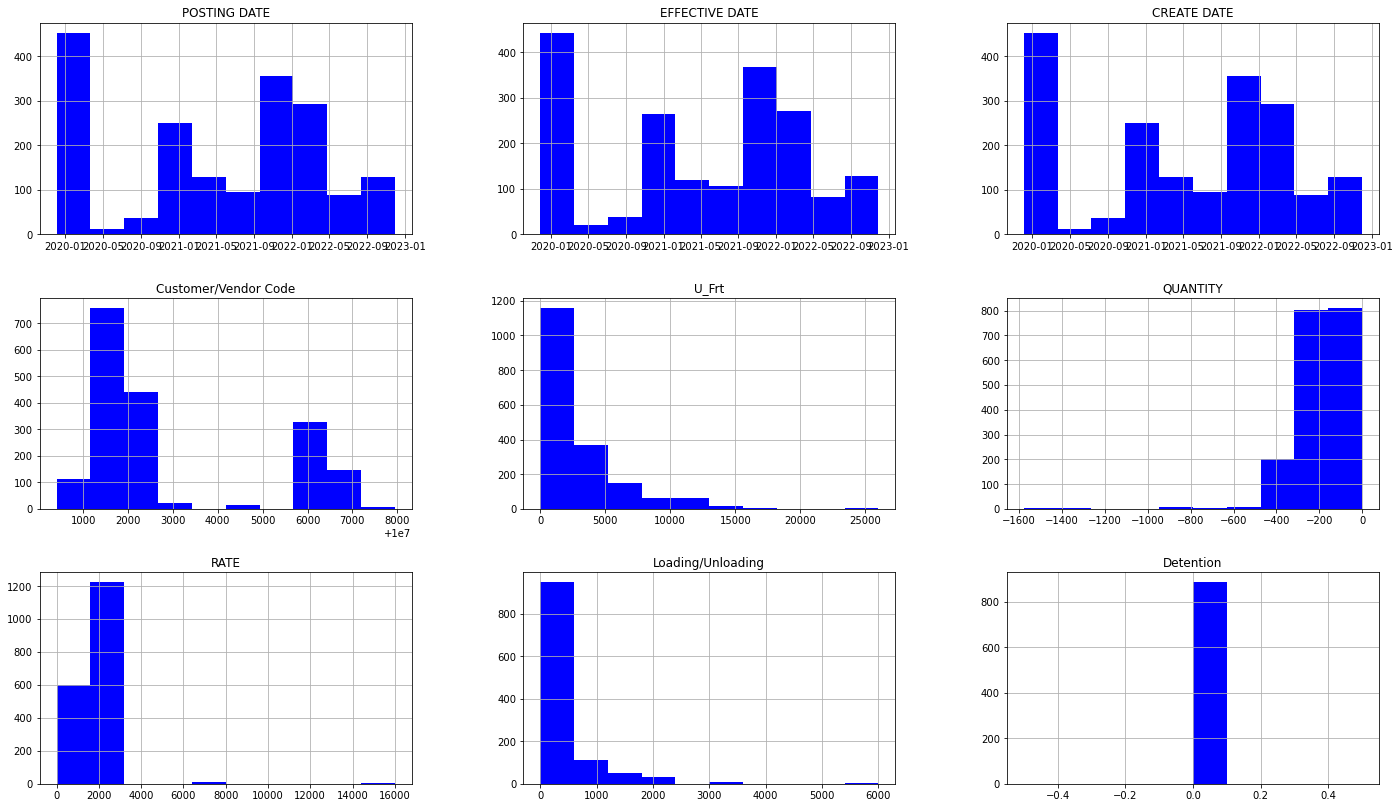

In [19]:
# Plots histogram for all the variables in the datset 

df.hist(bins = 10, figsize = (24,14), color='Blue')
plt.show

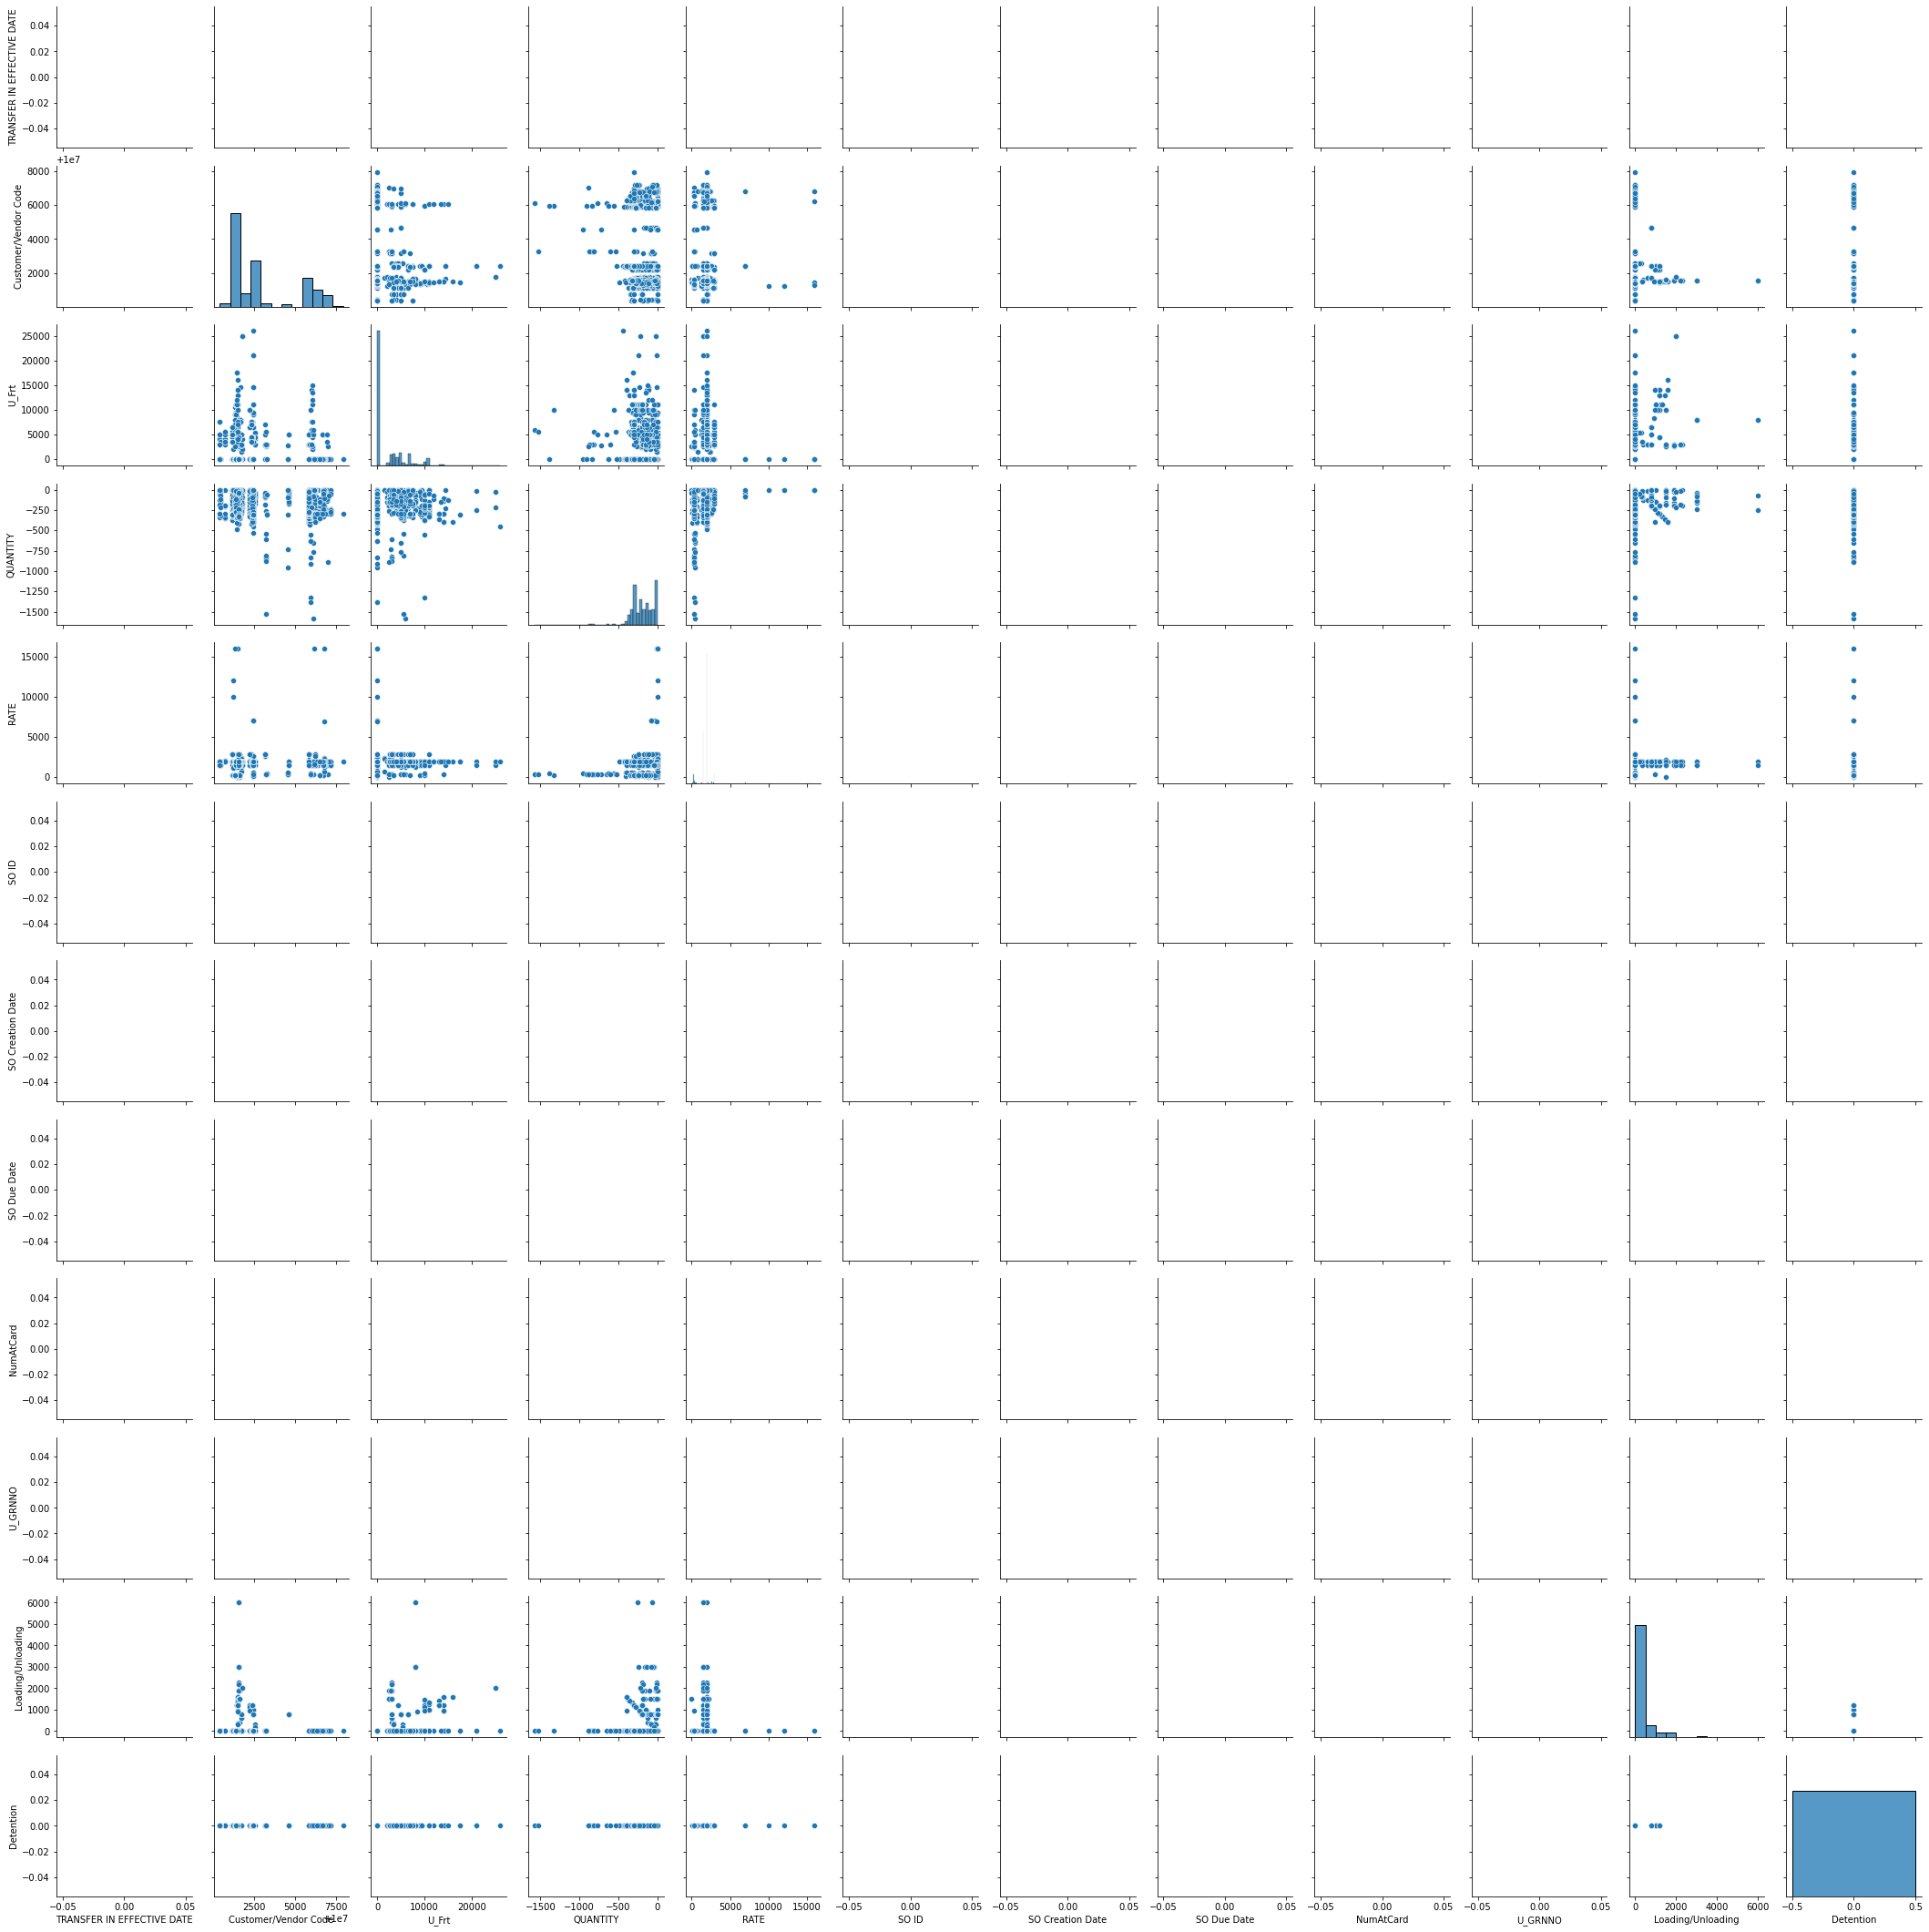

In [22]:
# Creates a pairplot
sns.pairplot(df.iloc[:, :])

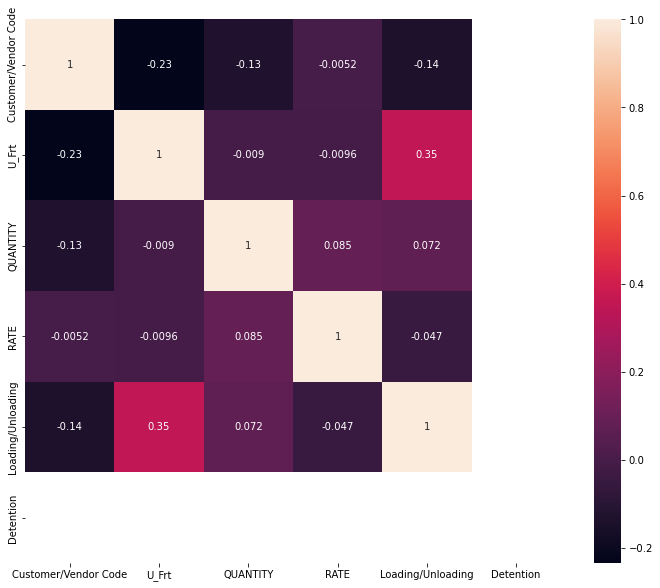

In [20]:
# Creates a heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
# Gives correlation matrix

df.corr()

,Customer/Vendor Code,U_Frt,QUANTITY,RATE,Loading/Unloading,Detention
Customer/Vendor Code,1.000000,-0.233956,-0.130883,-0.005157,-0.139389,NaN
U_Frt,-0.233956,1.000000,-0.008972,-0.009616,0.351272,NaN
QUANTITY,-0.130883,-0.008972,1.000000,0.084568,0.072165,NaN
RATE,-0.005157,-0.009616,0.084568,1.000000,-0.047336,NaN
Loading/Unloading,-0.139389,0.351272,0.072165,-0.047336,1.000000,NaN
Detention,NaN,NaN,NaN,NaN,NaN,NaN


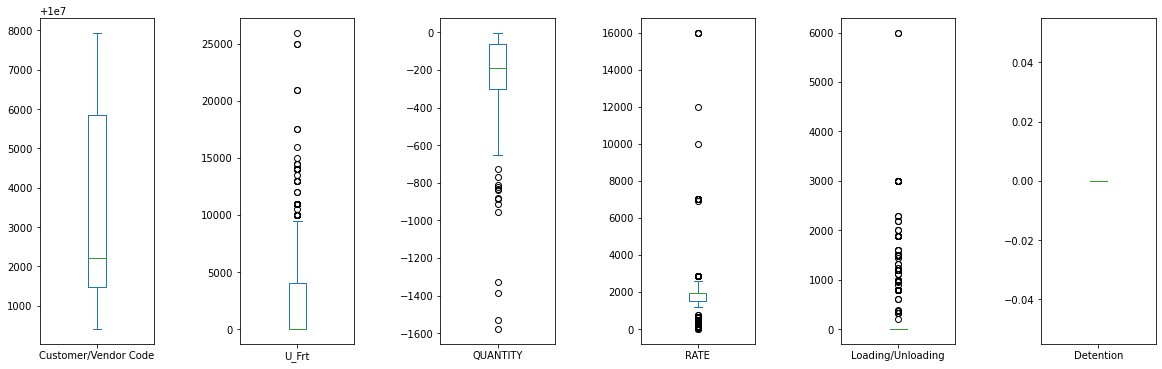

In [22]:
#Gives the multiple boxplots in a single visualization

df.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6)) 
plt.subplots_adjust(wspace = 0.75) 
plt.show()

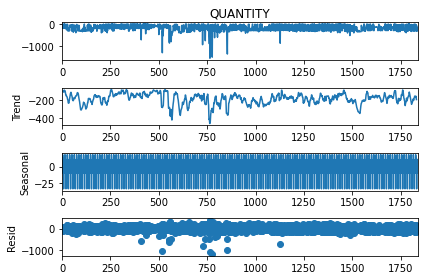

In [23]:
# To check for seasonality and trends

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['QUANTITY'], model='additive', period=12)
decomposition.plot()
plt.show()

### Data Preprocessing

In [25]:
df.columns

Index(['POSTING DATE', 'EFFECTIVE DATE', 'CREATE DATE',
       'TRANSFER IN EFFECTIVE DATE', 'Customer/Vendor Code',
       'Customer/Vendor Name', 'LOB', 'Region', 'BP TYPE', 'City', 'STATE',
       'From WhsCode', 'From WhsName', 'To whsCode', 'TO WhsName',
       'Model TYPE', 'Transfer Type', 'U_Frt', 'U_ActShipType',
       'PRODUCT CATEGORY', 'ItemCode', 'QUANTITY', 'UNIT', 'RATE', 'SO ID',
       'SO Creation Date', 'SO Due Date', 'U_DocStatus', 'NumAtCard',
       'U_SOTYPE', 'BP CATEGORY', 'Document Type', 'TRANSPORTER NAME',
       'U_GRNNO', 'Loading/Unloading', 'Detention', 'U_AssetClass'],
      dtype='object')

In [5]:
# Checking for the sequence of data

# Sort the data by timestamp
df = df.sort_values('POSTING DATE')

# Calculate time difference between consecutive data points
time_diff = (df['POSTING DATE'].iloc[1:] - df['POSTING DATE'].iloc[:-1]).reset_index(drop=True)

# Check if time difference is consistent or not
is_sequence = (time_diff == time_diff.iloc[0]).all()

# Print result
if is_sequence:
    print("Time series data is in sequence.")
else:
    print("Time series data is not in sequence.")

Time series data is not in sequence.


In [6]:
# Resampling the data

df['POSTING DATE'] = pd.to_datetime(df['POSTING DATE'], errors='coerce')

df = df.resample('W', on='POSTING DATE').sum()
df

,Customer/Vendor Code,U_Frt,QUANTITY,RATE,Loading/Unloading,Detention
POSTING DATE,,,,,,
2019-12-08,390062254,165500.0,-5879,70650.00,54530.0,0.0
2019-12-15,660096911,402800.0,-11914,119425.00,12036.0,0.0
2019-12-22,310053932,232400.0,-7775,56400.00,16160.0,0.0
2019-12-29,360053259,281000.0,-6759,67090.00,30880.0,0.0
2020-01-05,490089230,261700.0,-8874,82575.00,29416.0,0.0
...,...,...,...,...,...,...
2022-11-06,150058632,3.0,-3089,27940.00,0.0,0.0
2022-11-13,40015120,10.0,-900,7350.00,0.0,0.0
2022-11-20,80023032,2.0,-953,27950.00,0.0,0.0


In [7]:
# Creating a new variable with relevant columns only
new_df = df.loc[:, ['QUANTITY']]
new_df

,QUANTITY
POSTING DATE,
2019-12-08,-5879
2019-12-15,-11914
2019-12-22,-7775
2019-12-29,-6759
2020-01-05,-8874
...,...
2022-11-06,-3089
2022-11-13,-900
2022-11-20,-953


#### Missing values - To find missing values

In [8]:
# Checking for missing values

(new_df == 0).sum()

QUANTITY    33
dtype: int64

In [9]:
# Replacing 0 values with 'NaN' values

new_df.replace(0, np.NaN, inplace=True)

In [10]:
# Checking for nan values

new_df.isna().mean()*100

QUANTITY    21.019108
dtype: float64

In [11]:
# Filling the missing value using Forward fill method

ffill = new_df.fillna(method='ffill')
ffill.isna().sum()

QUANTITY    0
dtype: int64

In [13]:
# Bfill imputation

bfill = new_df.fillna(method='bfill')
bfill.isna().sum()

QUANTITY    0
dtype: int64

In [14]:
# Linear interpolation

lin_interpolation = new_df.interpolate(method='linear')
lin_interpolation.isna().sum()

QUANTITY    0
dtype: int64

In [15]:
# Quadratic interpolation

qua_interpolation = new_df.interpolate(method='quadratic')
qua_interpolation.isna().sum()

QUANTITY    0
dtype: int64

In [16]:
# Spline interpolation

spl_interpolation = new_df.interpolate(option='spline')
spl_interpolation.isna().sum()

QUANTITY    0
dtype: int64

In [17]:
# CubicSpline interpolation

from scipy.interpolate import CubicSpline

cub_spl_interpolation = new_df.interpolate(option='cubic')
cub_spl_interpolation.isna().sum()

QUANTITY    0
dtype: int64

In [18]:
# KNN Imputation

from sklearn.impute import KNNImputer

# create KNN imputer object and perform imputation
imputer = KNNImputer(n_neighbors=2)
df_imputed = imputer.fit_transform(new_df)

# check if any missing values still exist in the imputed DataFrame
missing_values = pd.DataFrame(df_imputed).isnull().sum()

# Checking for missing values

missing_values.isna().sum()

0

In [12]:
# Applying Cubic interpolation to the data

cub_interpolation = new_df.interpolate(option='cubic', inplace=True)

new_df.isna().sum()

QUANTITY    0
dtype: int64

In [13]:
# Saves the missing values process 
joblib.dump(cub_interpolation, "impute")

['impute']

#### Outlier Treatment - To treat outliers

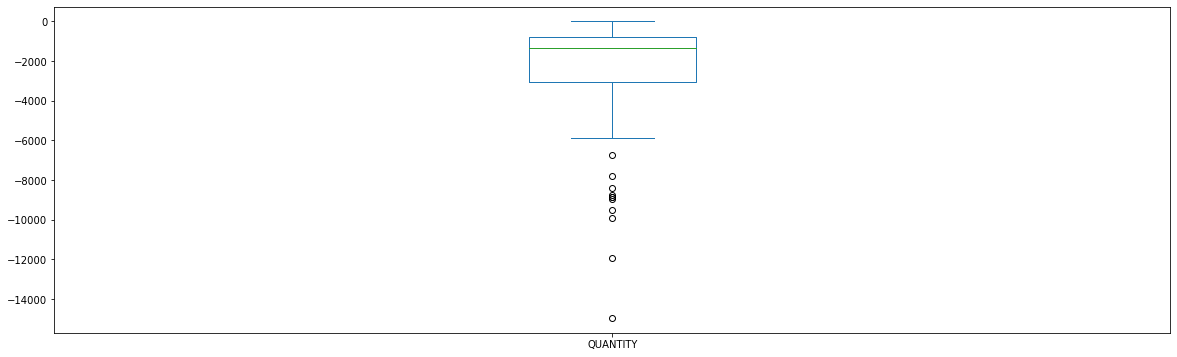

In [14]:
# Checking for Outliers using Boxplot

new_df['QUANTITY'].plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6)) 
plt.subplots_adjust(wspace = 0.75) 
plt.show()

In [15]:
# Treating the outliers

from feature_engine.outliers import Winsorizer

winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['QUANTITY'])
winsor = winsorizer.fit(new_df[['QUANTITY']])
joblib.dump(winsor, "winsor")
new_df.QUANTITY = winsor.transform(new_df[['QUANTITY']])

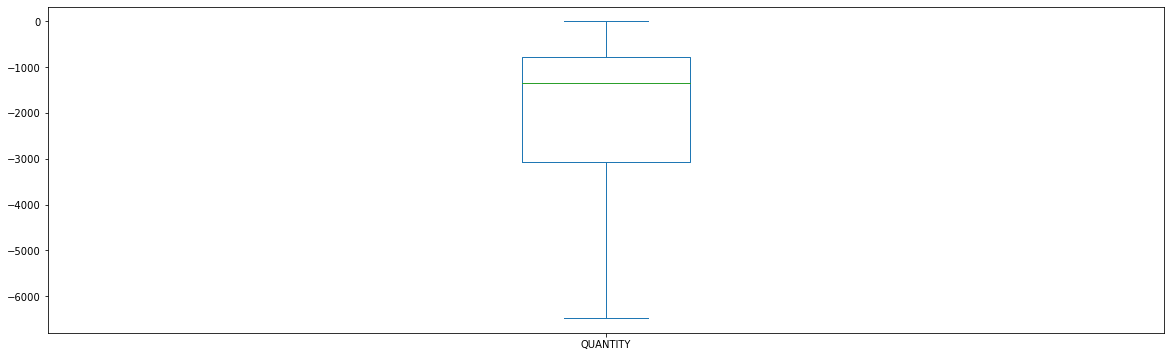

In [16]:
# Checking for Outliers

new_df['QUANTITY'].plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6)) 
plt.subplots_adjust(wspace = 0.75) 
plt.show()

#### Transformations - To check for Normal Distributions

Text(0.5, 1.0, 'Q-Q plot of original data')

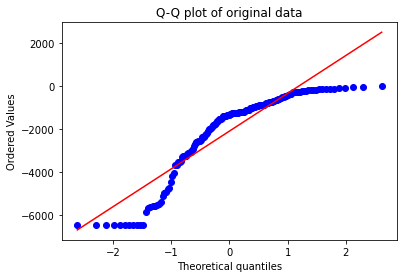

In [17]:
# Normal Quantile-Quantile Plot - To convert Inconsistent data(non-linear) into Consistent data(linear)

import scipy.stats as stats
import pylab

# Checking Whether data is normally distributed
stats.probplot(new_df.QUANTITY, dist="norm", plot=pylab)
plt.title("Q-Q plot of original data")

In [18]:
from statsmodels.tsa.stattools import adfuller

passing_data=adfuller(new_df['QUANTITY'])

def adf_test(QUANTITY):
    result=adfuller(QUANTITY)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")
        
adf_test(new_df['QUANTITY'])

Test parameters : -3.347623113906653
p-value : 0.012879372045768037
#Lags Used : 3
Dataset observations : 153
Dataset is stationary


In [19]:
df = new_df
df

,QUANTITY
POSTING DATE,
2019-12-08,-5879.000000
2019-12-15,-6474.642857
2019-12-22,-6474.642857
2019-12-29,-6474.642857
2020-01-05,-6474.642857
...,...
2022-11-06,-3089.000000
2022-11-13,-900.000000
2022-11-20,-953.000000


#### Splitting data for train & test split 

In [20]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [21]:
train_data.shape

(125, 1)

In [22]:
test_data.shape

(32, 1)

### Model Building 

##### ARIMA Model 

ARIMA is a popular time series forecasting model that combines autoregression (AR), differencing (I), and moving average (MA) components. It is useful for analyzing and forecasting data that exhibit temporal dependencies.

In [23]:
from statsmodels.tsa.arima_model import ARIMA

# Fit an ARIMA model to the data
ARIMA_model = sm.tsa.ARIMA(train_data, order=(2, 2, 0))  # Choose p=2, d=2, and q=0
results = ARIMA_model.fit()

# Make predictions on the training data
# (assuming train_data is a pandas DataFrame with the same columns as df)
Train_Predictions = results.predict(start=train_data.index[0], end=train_data.index[-1], dynamic = False)

# Make predictions on the testing data
# (assuming test_data is a pandas DataFrame with the same columns as df)
Test_Predictions = results.predict(start=test_data.index[0], end=test_data.index[-1], dynamic = False)

# Generate predictions for future data
future = pd.date_range(start=df.index[-1], periods=48, freq='W')
future_pred = results.forecast(steps= len(future))

# Calculate performance metrics for the predictions
mape = mean_absolute_percentage_error(test_data, Test_Predictions)
# Calculate root mean squared error
rmse = mean_squared_error(test_data, Test_Predictions, squared=False)
print('MAPE:', mape)
print('RMSE:', rmse)

MAPE: 5.759098445998304
RMSE: 3858.1658607304353


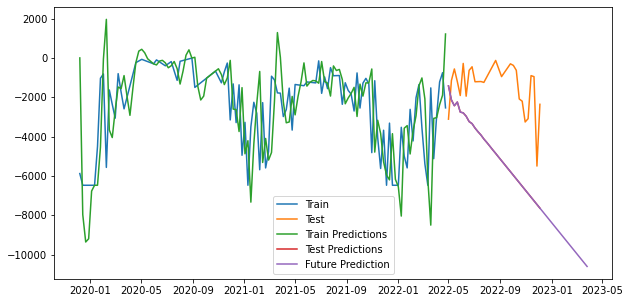

In [24]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['QUANTITY'], label='Train')
plt.plot(test_data.index, test_data['QUANTITY'], label='Test')
plt.plot(train_data.index, Train_Predictions, label='Train Predictions')
plt.plot(test_data.index, Test_Predictions, label='Test Predictions')
plt.plot(future_pred.index, future_pred, label ='Future Prediction')
plt.legend()
plt.show()

##### SARIMA Model 

SARIMA is an extension of the ARIMA model that is designed to handle seasonal patterns in time series data. It includes additional seasonal parameters (P, D, and Q) that capture the seasonal trends and help to improve the accuracy of the model. The SARIMA model is a powerful tool for forecasting time series data that exhibit seasonal behavior

In [25]:
# Fit a SARIMA model to the data
SARIMA_model = sm.tsa.statespace.SARIMAX(train_data, order=(2, 1, 0), seasonal_order=(1, 1, 0, 12))
results = SARIMA_model.fit()

# Make predictions on the training data
train_predictions = results.predict(start=train_data.index[0], end=train_data.index[-1], dynamic=False)

# Make predictions on the testing data
test_predictions = results.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

# Generate predictions for future data
future = pd.date_range(start=df.index[-1], periods=48, freq='W')
future_pred = results.forecast(steps= len(future))

# Calculate performance metrics for the predictions
mape = mean_absolute_percentage_error(test_data, test_predictions)
rmse = mean_squared_error(test_data, test_predictions, squared=False)

print('MAPE:', mape)
print('RMSE:', rmse)

MAPE: 2.5501087539945573
RMSE: 2113.596951928898


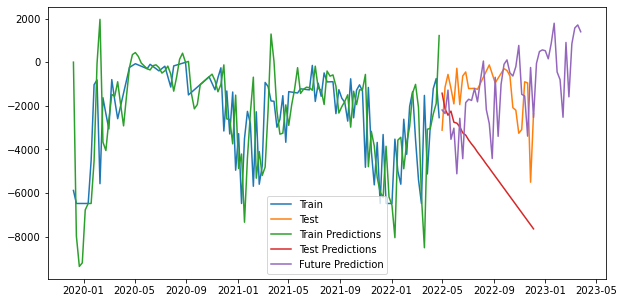

In [26]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['QUANTITY'], label='Train')
plt.plot(test_data.index, test_data['QUANTITY'], label='Test')
plt.plot(train_data.index, Train_Predictions, label='Train Predictions')
plt.plot(test_data.index, Test_Predictions, label='Test Predictions')
plt.plot(future_pred.index, future_pred, label ='Future Prediction')
plt.legend()
plt.show()

##### Simple Exponential Smoothing 

Simple Exponential Smoothing is a time series forecasting technique that uses a weighted average of past observations to predict future values.

In [27]:
from statsmodels.tsa.api import SimpleExpSmoothing

alpha = 0.2
ses = SimpleExpSmoothing(train_data)
results = ses.fit(smoothing_level = alpha, optimized = False)

# Make predictions on the training data
# (assuming train_data is a pandas DataFrame with the same columns as df)
Train_Predictions = results.predict(start=train_data.index[0], end=train_data.index[-1])

# Make predictions on the testing data
# (assuming test_data is a pandas DataFrame with the same columns as df)
Test_Predictions = results.predict(start=test_data.index[0], end=test_data.index[-1])

# Generate predictions for future data
future_pred = results.forecast(steps=12)

# Calculate performance metrics for the predictions
mape = mean_absolute_percentage_error(test_data, Test_Predictions)

# Calculate root mean squared error
rmse = mean_squared_error(test_data, Test_Predictions, squared=False)

print('MAPE:', mape)
print('RMSE:', rmse)

MAPE: 3.038610345098583
RMSE: 1812.0644880874538


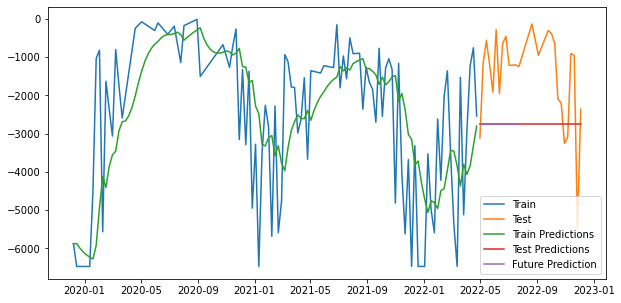

In [28]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['QUANTITY'], label='Train')
plt.plot(test_data.index, test_data['QUANTITY'], label='Test')
plt.plot(train_data.index, Train_Predictions, label='Train Predictions')
plt.plot(test_data.index, Test_Predictions, label='Test Predictions')
plt.plot(future_pred.index, future_pred, label ='Future Prediction')
plt.legend()
plt.show()

##### Autoregressive Moving Average (ARMA) Model 

ARMA is a popular time series forecasting model that combines autoregression (AR) and moving average (MA) components. It is a simplified version of the ARIMA model that does not include differencing. The ARMA model can be used to analyze and forecast data that exhibit temporal dependencies and can be effective for modeling stationary time series data.

In [29]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model to the data
ARMA_model = ARIMA(endog = train_data, order=(0, 0, 10))
results = ARMA_model.fit()

# Make predictions on the training data
train_predictions = results.predict(start=train_data.index[0], end=train_data.index[-1], dynamic=False)

# Make predictions on the testing data
test_predictions = results.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

# Generate predictions for future data
future = pd.date_range(start=df.index[-1], periods=48, freq='W')
future_pred = results.forecast(steps= len(future))

# Calculate performance metrics for the predictions
mape = mean_absolute_percentage_error(test_data, test_predictions)
rmse = mean_squared_error(test_data, test_predictions, squared=False)

print('MAPE:', mape)
print('RMSE:', rmse)

MAPE: 2.2080605243867266
RMSE: 1445.2416844417646


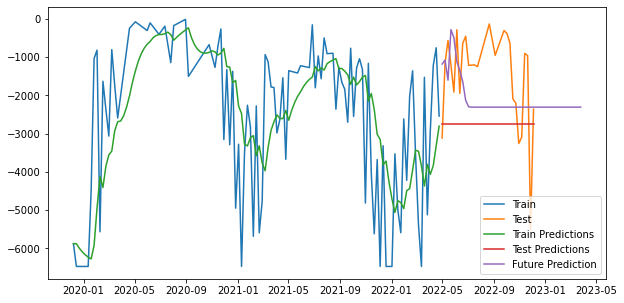

In [30]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['QUANTITY'], label='Train')
plt.plot(test_data.index, test_data['QUANTITY'], label='Test')
plt.plot(train_data.index, Train_Predictions, label='Train Predictions')
plt.plot(test_data.index, Test_Predictions, label='Test Predictions')
plt.plot(future_pred.index, future_pred, label ='Future Prediction')
plt.legend()
plt.show()

##### Autoregressive (AR) Model 

AR is a time series forecasting model that uses past observations to predict future values. It is a type of autoregressive model that includes only the autoregressive component, without differencing or moving average components

In [31]:
from statsmodels.tsa.ar_model import AutoReg

# Fit an ARIMA model to the data
ar_model = AutoReg(train_data, lags=8)
ar_model_results = ar_model.fit()

# Make predictions on the training data
train_predictions = ar_model_results.predict(start=train_data.index[0], end=train_data.index[-1])

# Make predictions on the testing data
test_predictions = ar_model_results.predict(start=test_data.index[0], end=test_data.index[-1])

# Generate predictions for future data
future = pd.date_range(start=df.index[-1], periods=48, freq='W')
future_pred = ar_model_results.forecast(steps= len(future))

# Calculate performance metrics for the predictions
mape = mean_absolute_percentage_error(test_data, test_predictions)
rmse = mean_squared_error(test_data, test_predictions, squared=False)

print('MAPE:', mape)
print('RMSE:', rmse)

MAPE: 1.8307458793521418
RMSE: 1259.599127653382


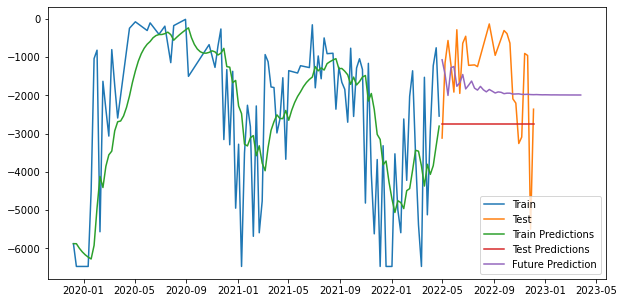

In [32]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(train_data.index, train_data['QUANTITY'], label='Train')
plt.plot(test_data.index, test_data['QUANTITY'], label='Test')
plt.plot(train_data.index, Train_Predictions, label='Train Predictions')
plt.plot(test_data.index, Test_Predictions, label='Test Predictions')
plt.plot(future_pred.index, future_pred, label ='Future Prediction')
plt.legend()
plt.show()

#### Model Selection 

In [33]:
# Saving the best model using Pickle library

ar_model_results.save("model.pickle")
